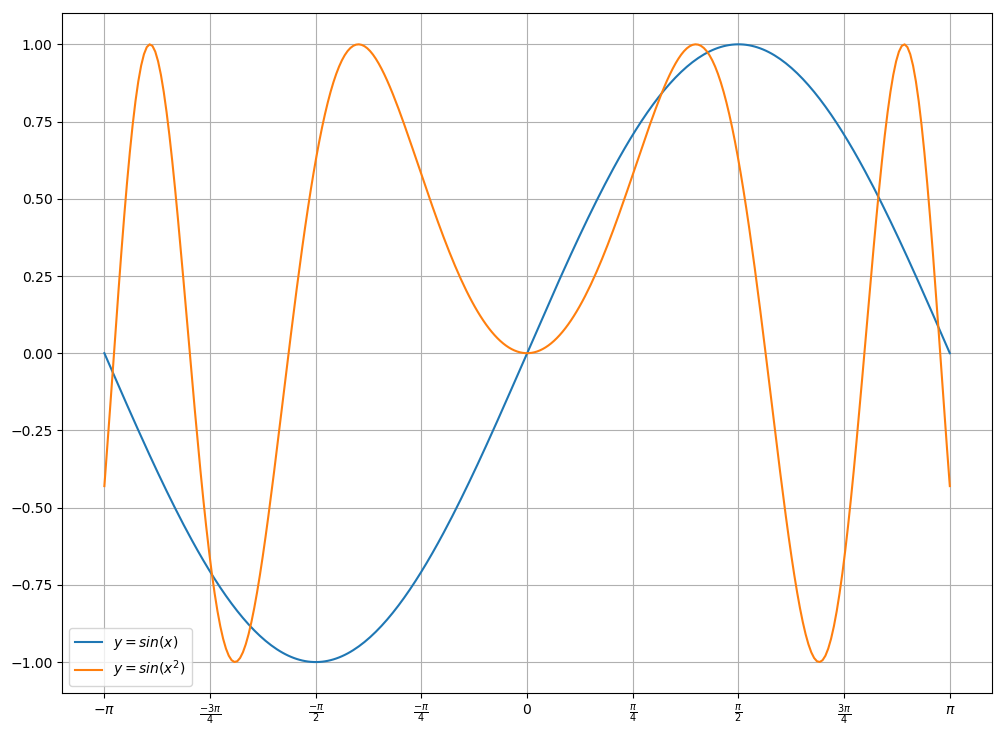

In [22]:
import numpy as np
import matplotlib.ticker as tck
import matplotlib.pyplot as plt

def multiple_formatter(denominator=2, number=np.pi, latex='\pi'):
    def gcd(a, b):
        while b:
            a, b = b, a%b
        return a
    def _multiple_formatter(x, pos):
        den = denominator
        num = np.int(np.rint(den*x/number))
        com = gcd(num,den)
        (num,den) = (int(num/com),int(den/com))
        if den==1:
            if num==0:
                return r'$0$'
            if num==1:
                return r'$%s$'%latex
            elif num==-1:
                return r'$-%s$'%latex
            else:
                return r'$%s%s$'%(num,latex)
        else:
            if num==1:
                return r'$\frac{%s}{%s}$'%(latex,den)
            elif num==-1:
                return r'$\frac{-%s}{%s}$'%(latex,den)
            else:
                return r'$\frac{%s%s}{%s}$'%(num,latex,den)
    return _multiple_formatter

class Multiple:
    def __init__(self, denominator=2, number=np.pi, latex='\pi'):
        self.denominator = denominator
        self.number = number
        self.latex = latex

    def locator(self):
        return plt.MultipleLocator(self.number / self.denominator)

    def formatter(self):
        return plt.FuncFormatter(multiple_formatter(self.denominator, self.number, self.latex))
    
figure, plot = plt.subplots(figsize=(12, 9), dpi=100)
plot.grid()

x     = np.linspace(start=-math.pi, stop=math.pi, num=300)
y     = np.sin(x)
sin,  = plot.plot(x, y, label='$y = sin(x)$')
y     = np.sin(x**2)
sin2, = plot.plot(x, y, label='$y = sin(x^2)$')

plot.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter(denominator=4)))
plot.xaxis.set_major_locator(tck.MultipleLocator(np.pi/4))

plt.legend(handles=[sin, sin2], loc='best')
plt.show()